In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [54]:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"
rcParams["font.size"] = 12

In [91]:
df_placas = pd.read_csv('placas.csv')

df_placas

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [92]:
df_placas.isna().sum() # Verificando los valores nulos

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [93]:
df_placas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [95]:
df_placas["MODULE_TEMPERATURE"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3177    False
3178    False
3179    False
3180    False
3181    False
Name: MODULE_TEMPERATURE, Length: 3182, dtype: bool

In [98]:
df_placas["MODULE_TEMPERATURE"].isna().sum()

0

In [101]:
df_placas["MODULE_TEMPERATURE"][df_placas["MODULE_TEMPERATURE"].isna()]

Series([], Name: MODULE_TEMPERATURE, dtype: float64)

In [104]:
df_placas[20:330][["MODULE_TEMPERATURE", "AMBIENT_TEMPERATURE", "IRRADIATION"]]

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION
20,22.551908,24.177106,0.000000
21,22.979492,24.304888,0.000000
22,23.452380,24.328727,0.000000
23,23.096692,24.289211,0.000863
24,22.206757,24.088446,0.005887
...,...,...,...
325,41.369017,25.706631,0.562313
326,46.148806,26.310502,0.603215
327,45.970447,26.840597,0.593244
328,44.061045,26.932355,0.551130


In [105]:
df_placas.drop(df_placas.dropna().index)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


In [107]:

df_placas.shape[0] - 0

3182

In [108]:
df_solar_filt = df_placas.dropna().reset_index(drop=True)
df_solar_filt

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Análisis exploratorio, tratamiento y limpieza de datos


In [109]:
df_solar_filt.describe()


,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [110]:
df_solar_filt.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [111]:
df_solar_filt.dtypes[df_solar_filt.dtypes == "object"]

DATE_TIME     object
SOURCE_KEY    object
dtype: object

In [112]:
df_solar_filt.dtypes[df_solar_filt.dtypes == "object"]

DATE_TIME     object
SOURCE_KEY    object
dtype: object

In [113]:
df_solar_filt['DATE_TIME'].value_counts()

DATE_TIME
2020-05-15 00:00:00    1
2020-06-06 20:45:00    1
2020-06-06 21:15:00    1
2020-06-06 21:30:00    1
2020-06-06 21:45:00    1
                      ..
2020-05-26 17:45:00    1
2020-05-26 18:00:00    1
2020-05-26 18:15:00    1
2020-05-26 18:30:00    1
2020-06-17 23:45:00    1
Name: count, Length: 3182, dtype: int64

In [114]:
# columnas a eliminar por ser informativas
columnas_drop = ["DATE_TIME", "SOURCE_KEY"]

In [115]:
df_solar_filt2 = df_solar_filt.drop(columns = columnas_drop)
print("Tamaño del tablón filtrado: ", df_solar_filt.shape)
print("Tamaño del tablón nuevo: ", df_solar_filt2.shape)

Tamaño del tablón filtrado:  (3182, 6)
Tamaño del tablón nuevo:  (3182, 4)


In [116]:
df_solar_filt2.dtypes.value_counts()

float64    3
int64      1
Name: count, dtype: int64

### Reducción de variables
Importancia de variables

In [118]:
# generar la lista de features y la variable target
target = 'MODULE_TEMPERATURE'
features = [x for x in df_solar_filt2.columns if x != target]

print(target)
print(features)

MODULE_TEMPERATURE
['PLANT_ID', 'AMBIENT_TEMPERATURE', 'IRRADIATION']


In [119]:
df_solar_filt2[target]

0       22.857507
1       22.761668
2       22.592306
3       22.360852
4       22.165423
          ...    
3177    21.480377
3178    21.389024
3179    20.709211
3180    20.734963
3181    20.427972
Name: MODULE_TEMPERATURE, Length: 3182, dtype: float64

In [120]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=42)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_solar_filt2[features], y=df_solar_filt2[target])

DecisionTreeRegressor(max_depth=13, random_state=42)

In [121]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_solar_filt2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_solar_filt2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_solar_filt2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_solar_filt2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_solar_filt2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_solar_filt2[target], y_pred_arbol))

Mean Absolute Error: 0.2913544437821614
Mean Absolute Percentage Error: 1.0937747350791314
Mean Squared Error: 0.2983069852067644
Root Mean Squared Error: 0.5461748668757694
R^2 coefficient of determination: 0.9980151282786599


In [122]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([0.        , 0.06689697, 0.93310303])

In [123]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
IRRADIATION,0.933103
AMBIENT_TEMPERATURE,0.066897
PLANT_ID,0.000000


In [124]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
IRRADIATION,0.933103,0.933103
AMBIENT_TEMPERATURE,0.066897,1.000000
PLANT_ID,0.000000,1.000000


In [125]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.90]

,Importancia,imp_acum


In [126]:
variables = importancia.loc[importancia['imp_acum']>0.90].index.to_list()
print(variables)

['IRRADIATION', 'AMBIENT_TEMPERATURE', 'PLANT_ID']


Todas ls variables tienen importancia, no eliminamos ninguna.

### Panteamiento del ejercicio de clasificación

In [127]:
df_potencia = df_solar_filt2.copy()

In [128]:
df_potencia["Escenario"] = np.where(df_potencia['POTENCIA KWP'].quantile(0.33),0,1)
df_potencia.drop(['POTENCIA KWP'], axis = 'columns', inplace = True)
df_potencia

KeyError: 'POTENCIA KWP'

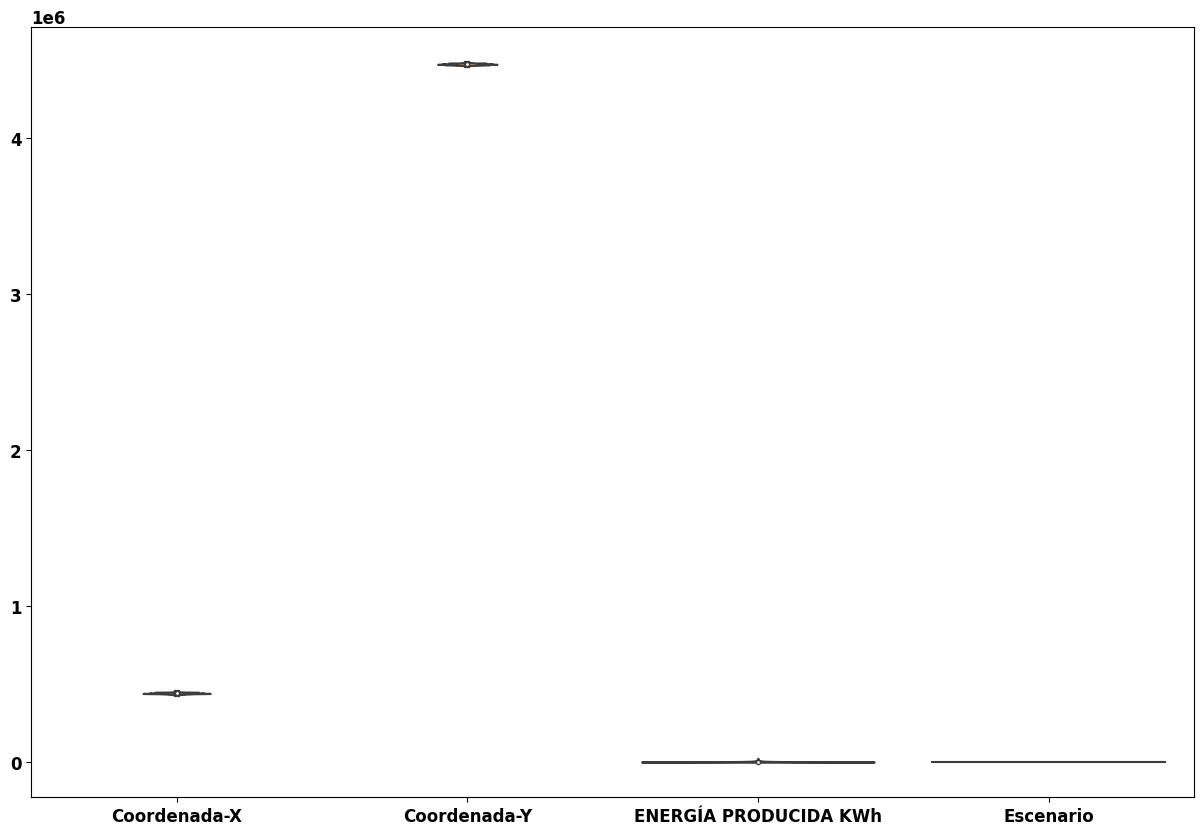

In [84]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df_potencia, orient = 'v')
plt.show()

### Obtención y preparación de datos

In [85]:
X =   df_potencia.drop('Escenario', axis = 'columns')
y = df_potencia['Escenario']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
ds_normal = scaler.transform(X)
ds_normal

array([[-1.40678303, -1.08597009, -0.5316131 ],
       [ 0.1917102 , -0.56518193, -0.65624449],
       [-0.37804976, -1.61154811, -0.73933209],
       ...,
       [ 0.68201536,  0.32607994, -0.80949495],
       [ 0.32811627, -0.60674483, -0.25927042],
       [ 1.69863133, -1.25616244, -0.39682655]])

In [87]:
X_normal = pd.DataFrame(ds_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,Coordenada-X,Coordenada-Y,ENERGÍA PRODUCIDA KWh
0,-1.406783,-1.085970,-0.531613
1,0.191710,-0.565182,-0.656244
2,-0.378050,-1.611548,-0.739332
3,-0.810068,1.097552,-0.843192
4,-0.148069,-0.108404,-0.739332
...,...,...,...
4968,0.594474,1.571639,3.705987
4969,-0.665106,0.018266,-0.396827
4970,0.682015,0.326080,-0.809495
4971,0.328116,-0.606745,-0.259270


In [88]:
X_normal.describe().round(4)

,Coordenada-X,Coordenada-Y,ENERGÍA PRODUCIDA KWh
count,4973.0000,4973.0000,4973.0000
mean,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-2.0881,-1.9111,-0.9525
25%,-0.6862,-0.8040,-0.5808
50%,-0.0333,-0.1219,-0.3241
75%,0.7929,0.5622,0.2339
max,2.2388,2.2423,8.8971


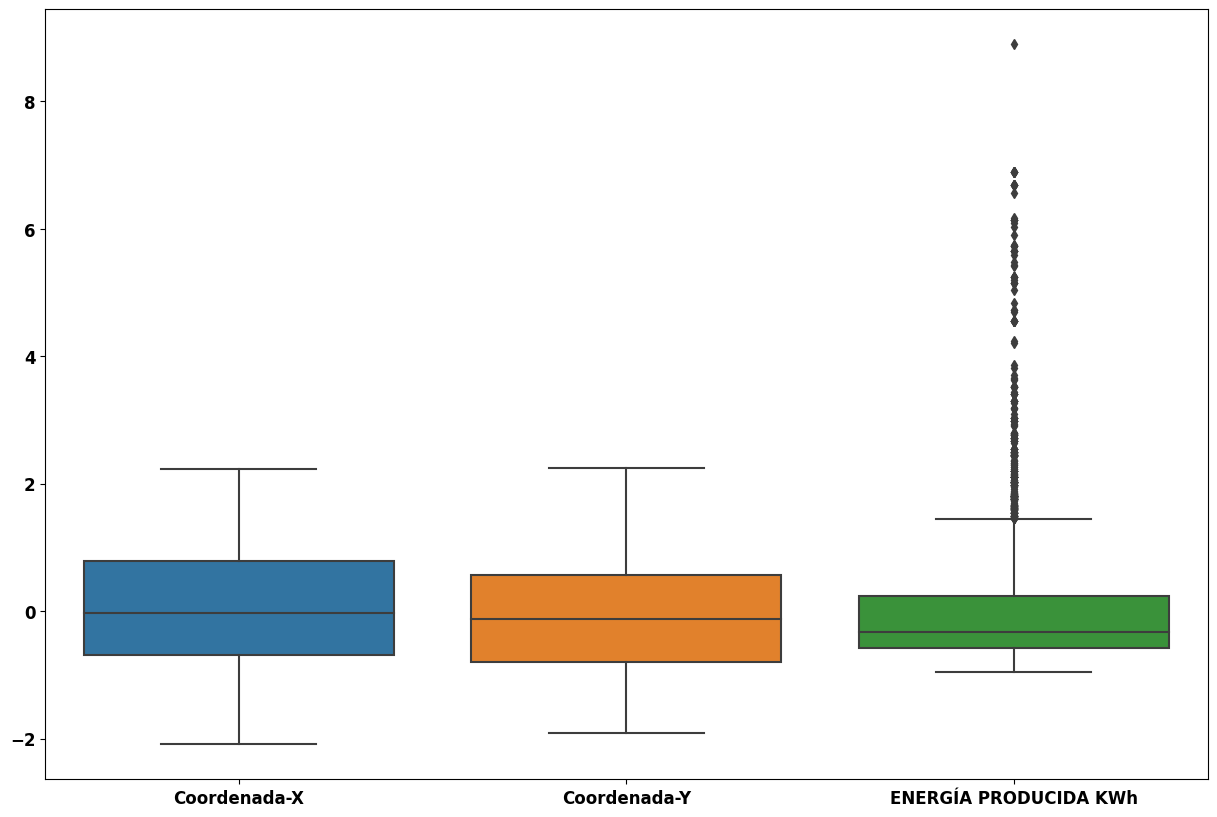

In [89]:
plt.figure(figsize=(15,10))
sns.boxplot(data=X_normal, orient = 'v')
plt.show()

### Dividir el dataset en Training y Test